The latent class logit (discrete heterogeneity) model. Start with 1 segment and stop at 5. Compute BIC along the way. See if you can interpret one of these models. Now re-estimate the models dropping the first observation in 1). How well do the latent class models fit relative to the state dependence model i) above? What is the difference in interpretation between the models?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

# Data Loading and Analysis

In [2]:
yogurt_df = pd.read_csv("../datasets/Yogurt100N.csv")

In [3]:
yogurt_df.describe()

Pan I.D.     Expend $       Income      HH Size          IPT  \
count  2430.000000  2430.000000  2430.000000  2430.000000  2430.000000   
mean     48.607819    36.476062     8.720988     2.802058     4.533745   
std      27.858116    31.673291     3.800654     1.173291    14.930892   
min       1.000000    -0.100000     1.000000     1.000000     1.000000   
25%      23.000000    12.092500     6.000000     2.000000     1.000000   
50%      47.000000    27.485001     9.000000     3.000000     3.000000   
75%      73.000000    51.712500    12.000000     4.000000     5.000000   
max     100.000000   286.720000    14.000000     6.000000   358.000000   

          Quantity      Brand 1     Brand  2      Brand 3      Brand 4  \
count  2430.000000  2430.000000  2430.000000  2430.000000  2430.000000   
mean      2.585597     0.341975     0.401235     0.029218     0.227572   
std       1.869089     0.474469     0.490249     0.168452     0.419351   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     0.000000   
50%       2.000000     0.000000     0.000000     0.000000     0.000000   
75%       3.000000     1.000000     1.000000     0.000000     0.000000   
max      14.000000     1.000000     1.000000     1.000000     1.000000   

         Feature 1    Feature 2    Feature 3    Feature 4      Price 1  \
count  2430.000000  2430.000000  2430.000000  2430.000000  2430.000000   
mean      0.055556     0.039506     0.037449     0.037449     0.106248   
std       0.229109     0.194836     0.189897     0.189897     0.020587   
min       0.000000     0.000000     0.000000     0.000000    -0.012000   
25%       0.000000     0.000000     0.000000     0.000000     0.103000   
50%       0.000000     0.000000     0.000000     0.000000     0.108000   
75%       0.000000     0.000000     0.000000     0.000000     0.115000   
max       1.000000     1.000000     1.000000     1.000000     0.193000   

           Price 2      Price 3      Price 4  PanelistFirstObs  
count  2430.000000  2430.000000  2430.000000       2430.000000  
mean      0.081532     0.053622     0.079507          0.041152  
std       0.011047     0.008054     0.007714          0.198683  
min       0.000000     0.025000     0.004000          0.000000  
25%       0.081000     0.050000     0.079000          0.000000  
50%       0.086000     0.054000     0.079000          0.000000  
75%       0.086000     0.061000     0.086000          0.000000  
max       0.111000     0.086000     0.104000          1.000000

In [4]:
yogurt_df.head()

Pan I.D.   Expend $  Income  HH Size  IPT  Quantity  Brand 1  Brand  2  \
0         1  40.900002       9        2    5         2        0         0   
1         1  16.809999       9        2    5         2        0         1   
2         1   4.060000       9        2    1         2        0         1   
3         1  34.459999       9        2    4         2        0         1   
4         1   8.390000       9        2    7         2        0         1   

   Brand 3  Brand 4  Feature 1  Feature 2  Feature 3  Feature 4  Price 1  \
0        0        1          0          0          0          0    0.108   
1        0        0          0          0          0          0    0.108   
2        0        0          0          0          0          0    0.108   
3        0        0          0          0          0          0    0.108   
4        0        0          0          0          0          0    0.125   

   Price 2  Price 3  Price 4  PanelistFirstObs  
0    0.081    0.061    0.079                 1  
1    0.098    0.064    0.075                 0  
2    0.098    0.061    0.086                 0  
3    0.098    0.061    0.086                 0  
4    0.098    0.049    0.079                 0

# Model with 1 segment (baseline model)

In [5]:
"""
fun callable
The objective function to be minimized.

fun(x, *args) -> float

where x is a 1-D array with shape (n,) and args is a tuple of the fixed parameters needed to completely specify the function.
"""
def optimization_func(x):
    a1, a2, a3, bf, bp = x
    v1 = np.exp(a1 + bf*yogurt_df['Feature 1'] + bp*yogurt_df['Price 1'])
    v2 = np.exp(a2 + bf*yogurt_df['Feature 2'] + bp*yogurt_df['Price 2'])
    v3 = np.exp(a3 + bf*yogurt_df['Feature 3'] + bp*yogurt_df['Price 3'])
    v4 = np.exp(0 + bf*yogurt_df['Feature 4'] + bp*yogurt_df['Price 4'])
    denom = v1 + v2 + v3 + v4
    loss = (v1*yogurt_df['Brand 1'] + v2*yogurt_df['Brand  2'] + v3*yogurt_df['Brand 3'] + v4*yogurt_df['Brand 4'])/denom
    log_loss = np.log(loss)
    total_ll = np.sum(log_loss)
    
    return -total_ll

In [6]:
a1, a2, a3, bf, bp = 1, 1, 1, 1, 1
x_init = np.array([a1, a2, a3, bf, bp])
output = opt.minimize(optimization_func, x_init, options={'gtol': 0.001})

In [7]:
output.x

array([  1.38775775,   0.64350504,  -3.08612187,   0.48741097,
       -37.05809013])

In [8]:
output

      fun: 2658.556697507448
 hess_inv: array([[ 7.31431810e-03,  2.19894144e-03, -2.60613505e-03,
        -2.02728035e-03, -1.48218164e-01],
       [ 2.19894144e-03,  3.03292937e-03,  1.60753512e-03,
        -1.29048511e-04, -1.13511244e-02],
       [-2.60613505e-03,  1.60753512e-03,  1.98742582e-02,
         1.56499141e-03,  1.54833107e-01],
       [-2.02728035e-03, -1.29048511e-04,  1.56499141e-03,
         1.26688626e-02,  6.20651477e-02],
       [-1.48218164e-01, -1.13511244e-02,  1.54833107e-01,
         6.20651477e-02,  5.24561718e+00]])
      jac: array([ 0.00000000e+00,  0.00000000e+00, -1.22070312e-04, -1.22070312e-04,
       -3.05175781e-05])
  message: 'Optimization terminated successfully.'
     nfev: 114
      nit: 16
     njev: 19
   status: 0
  success: True
        x: array([  1.38775775,   0.64350504,  -3.08612187,   0.48741097,
       -37.05809013])

In [9]:
BIC = np.log(yogurt_df.shape[0])*(5)-2*(-output.fun)

In [10]:
BIC

5356.091627696569

# Model with 2 segments

In [11]:
def optimization_func_2_segments(x, y_df):
    a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, lam = x
    v1_1 = np.exp(a1_1 + bf_1 * y_df['Feature 1'] + bp_1 * y_df['Price 1'])
    v2_1 = np.exp(a2_1 + bf_1 * y_df['Feature 2'] + bp_1 * y_df['Price 2'])
    v3_1 = np.exp(a3_1 + bf_1 * y_df['Feature 3'] + bp_1 * y_df['Price 3'])
    v4_1 = np.exp(0 + bf_1 * y_df['Feature 4'] + bp_1 * y_df['Price 4'])
    denom1 = v1_1 + v2_1 + v3_1 + v4_1
    y_df['seg_1'] = (v1_1 * y_df['Brand 1'] + v2_1 * y_df['Brand  2'] + v3_1 * y_df['Brand 3'] + v4_1 * y_df['Brand 4']) / denom1

    v1_2 = np.exp(a1_2 + bf_2 * y_df['Feature 1'] + bp_2 * y_df['Price 1'])
    v2_2 = np.exp(a2_2 + bf_2 * y_df['Feature 2'] + bp_2 * y_df['Price 2'])
    v3_2 = np.exp(a3_2 + bf_2 * y_df['Feature 3'] + bp_2 * y_df['Price 3'])
    v4_2 = np.exp(0 + bf_2 * y_df['Feature 4'] + bp_2 * y_df['Price 4'])
    denom2 = v1_2 + v2_2 + v3_2 + v4_2
    y_df['seg_2'] = (v1_2 * y_df['Brand 1'] + v2_2 * y_df['Brand  2'] + v3_2 * y_df['Brand 3'] + v4_2 * y_df['Brand 4']) / denom2
    
    segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
    
    pi = np.exp(lam) / (1+np.exp(lam))
    
    loss = segs_by_pid['seg_1']*pi + segs_by_pid['seg_2']*(1-pi)
    
    log_loss = np.log(loss)
    
    total_ll = np.sum(log_loss)
    
    return -total_ll

In [12]:
a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, lam = 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5
x_init = np.array([a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, lam])
output_2 = opt.minimize(
    optimization_func_2_segments,
    x_init,
    yogurt_df,
    tol=1e-20,
    method='L-BFGS-B'
)

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/182440835.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecate

In [13]:
output_2

      fun: 1915.8010526813844
 hess_inv: <11x11 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.27373677e-05, -4.54747354e-05, -2.27373674e-05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.27373677e-05,  0.00000000e+00,
        2.27373676e-05,  0.00000000e+00,  0.00000000e+00])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1620
      nit: 92
     njev: 135
   status: 0
  success: True
        x: array([  2.69789133,   3.85203878,  -0.67356077,   1.42634271,
       -50.36347163,   1.33355222,  -1.29432761,  -4.28492943,
         0.37733693, -36.91767812,  -0.09495251])

In [14]:
a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, lam = output_2.x

### Segment 1

In [15]:
print (f"a1 = {a1_1}")
print (f"a2 = {a2_1}")
print (f"a3 = {a3_1}")
print (f"bp = {bf_1}")
print (f"bf = {bp_1}")

a1 = 2.6978913320402627
a2 = 3.8520387834309853
a3 = -0.6735607749928663
bp = 1.426342708805948
bf = -50.36347162720578


### Segment 2

In [16]:
print (f"a1 = {a1_2}")
print (f"a2 = {a2_2}")
print (f"a3 = {a3_2}")
print (f"bp = {bf_2}")
print (f"bf = {bp_2}")

a1 = 1.3335522161927629
a2 = -1.2943276118045737
a3 = -4.284929429867665
bp = 0.37733692965305066
bf = -36.91767812187867


In [17]:
print (f"Probability (seg 1) = {round(np.exp(-0.09495251)/(1+np.exp(-0.09495251)),2)}")

Probability (seg 1) = 0.48


In [18]:
print (f"Probability (seg 2) = {1 - round(np.exp(-0.09495251)/(1+np.exp(-0.09495251)),2)}")

Probability (seg 2) = 0.52


In [19]:
BIC_2 = np.log(yogurt_df.shape[0])*(11)-2*(-output_2.fun)

In [20]:
BIC_2

3917.3542172624493

# Model with 3 segments

In [21]:
def optimization_func_3_segments(x, y_df):
    a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, a1_3, a2_3, a3_3, bf_3, bp_3, lam_1, lam_2 = x
    v1_1 = np.exp(a1_1 + bf_1 * y_df['Feature 1'] + bp_1 * y_df['Price 1'])
    v2_1 = np.exp(a2_1 + bf_1 * y_df['Feature 2'] + bp_1 * y_df['Price 2'])
    v3_1 = np.exp(a3_1 + bf_1 * y_df['Feature 3'] + bp_1 * y_df['Price 3'])
    v4_1 = np.exp(0 + bf_1 * y_df['Feature 4'] + bp_1 * y_df['Price 4'])
    denom1 = v1_1 + v2_1 + v3_1 + v4_1
    y_df['seg_1'] = (v1_1 * y_df['Brand 1'] + v2_1 * y_df['Brand  2'] + v3_1 * y_df['Brand 3'] + v4_1 * y_df['Brand 4']) / denom1

    v1_2 = np.exp(a1_2 + bf_2 * y_df['Feature 1'] + bp_2 * y_df['Price 1'])
    v2_2 = np.exp(a2_2 + bf_2 * y_df['Feature 2'] + bp_2 * y_df['Price 2'])
    v3_2 = np.exp(a3_2 + bf_2 * y_df['Feature 3'] + bp_2 * y_df['Price 3'])
    v4_2 = np.exp(0 + bf_2 * y_df['Feature 4'] + bp_2 * y_df['Price 4'])
    denom2 = v1_2 + v2_2 + v3_2 + v4_2
    y_df['seg_2'] = (v1_2 * y_df['Brand 1'] + v2_2 * y_df['Brand  2'] + v3_2 * y_df['Brand 3'] + v4_2 * y_df['Brand 4']) / denom2
    
    v1_3 = np.exp(a1_3 + bf_3 * y_df['Feature 1'] + bp_3 * y_df['Price 1'])
    v2_3 = np.exp(a2_3 + bf_3 * y_df['Feature 2'] + bp_3 * y_df['Price 2'])
    v3_3 = np.exp(a3_3 + bf_3 * y_df['Feature 3'] + bp_3 * y_df['Price 3'])
    v4_3 = np.exp(0 + bf_3 * y_df['Feature 4'] + bp_3 * y_df['Price 4'])
    denom3 = v1_3 + v2_3 + v3_3 + v4_3
    y_df['seg_3'] = (v1_3 * y_df['Brand 1'] + v2_3 * y_df['Brand  2'] + v3_3 * y_df['Brand 3'] + v4_3 * y_df['Brand 4']) / denom3
    
    segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
    
    pi_1 = np.exp(lam_1) / (1 + np.exp(lam_1) + np.exp(lam_2))
    pi_2 = np.exp(lam_2) / (1 + np.exp(lam_1) + np.exp(lam_2))
    
    loss = segs_by_pid['seg_1']*pi_1 + segs_by_pid['seg_2']*pi_2 + segs_by_pid['seg_3'] * (1 - pi_1 - pi_2)
    
    log_loss = np.log(loss)
    
    total_ll = np.sum(log_loss)
    
    return -total_ll

In [22]:
a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, a1_3, a2_3, a3_3, bf_3, bp_3, lam_1, lam_2 = 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.33, 0.33
x_init = np.array([a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, a1_3, a2_3, a3_3, bf_3, bp_3, lam_1, lam_2])
output_3 = opt.minimize(
    optimization_func_3_segments,
    x_init,
    yogurt_df,
    tol=1e-20,
    method='L-BFGS-B'
)

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4000481035.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a t

In [23]:
output_3

      fun: 1490.7294267482152
 hess_inv: <17x17 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.27373677e-05,  2.27373677e-05,  2.27373677e-05,  0.00000000e+00,
        0.00000000e+00, -2.27373677e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.54747349e-05,  0.00000000e+00,
        2.27373677e-05,  2.27373674e-05,  0.00000000e+00,  4.54747349e-05,
        0.00000000e+00])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 4842
      nit: 210
     njev: 269
   status: 0
  success: True
        x: array([  5.15088943,   1.41486842,  -1.83923553,  -0.18287701,
       -58.1022458 ,   2.5406413 ,   3.82123812,  -0.72596921,
         1.46880681, -50.31379551,  -0.80920786,  -2.00751543,
        -5.26291952,   0.93051938, -27.3396817 ,   0.58836233,
         0.86848724])

In [24]:
a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, a1_3, a2_3, a3_3, bf_3, bp_3, lam_1, lam_2 = output_3.x

### Segment 1

In [25]:
print (f"a1 = {a1_1}")
print (f"a2 = {a2_1}")
print (f"a3 = {a3_1}")
print (f"bp = {bf_1}")
print (f"bf = {bp_1}")

a1 = 5.1508894343354985
a2 = 1.414868417111404
a3 = -1.8392355339373054
bp = -0.1828770115738286
bf = -58.102245797379496


### Segment 2

In [26]:
print (f"a1 = {a1_2}")
print (f"a2 = {a2_2}")
print (f"a3 = {a3_2}")
print (f"bp = {bf_2}")
print (f"bf = {bp_2}")

a1 = 2.540641296651735
a2 = 3.8212381233072206
a3 = -0.7259692101742306
bp = 1.468806814041974
bf = -50.31379550976936


### Segment 3

In [27]:
print (f"a1 = {a1_3}")
print (f"a2 = {a2_3}")
print (f"a3 = {a3_3}")
print (f"bp = {bf_3}")
print (f"bf = {bp_3}")

a1 = -0.8092078623734101
a2 = -2.0075154266650963
a3 = -5.262919515853379
bp = 0.9305193795272738
bf = -27.339681702921787


In [28]:
pi_1 = np.exp(lam_1) / (1 + np.exp(lam_1) + np.exp(lam_2))
pi_2 = np.exp(lam_2) / (1 + np.exp(lam_1) + np.exp(lam_2))
print (f"Probability (seg 1) = {pi_1}")
print (f"Probability (seg 2) = {pi_2}")
print (f"Probability (seg 3) = {1 - pi_1 - pi_2}")

Probability (seg 1) = 0.34739942872168555
Probability (seg 2) = 0.45971196012549603
Probability (seg 3) = 0.19288861115281847


In [29]:
BIC_3 = np.log(yogurt_df.shape[0])*(17)-2*(-output_3.fun)

In [30]:
BIC_3

3113.9848446141186

# Model with 4 segments

In [31]:
def optimization_func_4_segments(x, y_df):
    a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, a1_3, a2_3, a3_3, bf_3, bp_3, a1_4, a2_4, a3_4, bf_4, bp_4, lam_1, lam_2, lam_3 = x
    v1_1 = np.exp(a1_1 + bf_1 * y_df['Feature 1'] + bp_1 * y_df['Price 1'])
    v2_1 = np.exp(a2_1 + bf_1 * y_df['Feature 2'] + bp_1 * y_df['Price 2'])
    v3_1 = np.exp(a3_1 + bf_1 * y_df['Feature 3'] + bp_1 * y_df['Price 3'])
    v4_1 = np.exp(0 + bf_1 * y_df['Feature 4'] + bp_1 * y_df['Price 4'])
    denom1 = v1_1 + v2_1 + v3_1 + v4_1
    y_df['seg_1'] = (v1_1 * y_df['Brand 1'] + v2_1 * y_df['Brand  2'] + v3_1 * y_df['Brand 3'] + v4_1 * y_df['Brand 4']) / denom1

    v1_2 = np.exp(a1_2 + bf_2 * y_df['Feature 1'] + bp_2 * y_df['Price 1'])
    v2_2 = np.exp(a2_2 + bf_2 * y_df['Feature 2'] + bp_2 * y_df['Price 2'])
    v3_2 = np.exp(a3_2 + bf_2 * y_df['Feature 3'] + bp_2 * y_df['Price 3'])
    v4_2 = np.exp(0 + bf_2 * y_df['Feature 4'] + bp_2 * y_df['Price 4'])
    denom2 = v1_2 + v2_2 + v3_2 + v4_2
    y_df['seg_2'] = (v1_2 * y_df['Brand 1'] + v2_2 * y_df['Brand  2'] + v3_2 * y_df['Brand 3'] + v4_2 * y_df['Brand 4']) / denom2
    
    v1_3 = np.exp(a1_3 + bf_3 * y_df['Feature 1'] + bp_3 * y_df['Price 1'])
    v2_3 = np.exp(a2_3 + bf_3 * y_df['Feature 2'] + bp_3 * y_df['Price 2'])
    v3_3 = np.exp(a3_3 + bf_3 * y_df['Feature 3'] + bp_3 * y_df['Price 3'])
    v4_3 = np.exp(0 + bf_3 * y_df['Feature 4'] + bp_3 * y_df['Price 4'])
    denom3 = v1_3 + v2_3 + v3_3 + v4_3
    y_df['seg_3'] = (v1_3 * y_df['Brand 1'] + v2_3 * y_df['Brand  2'] + v3_3 * y_df['Brand 3'] + v4_3 * y_df['Brand 4']) / denom3
    
    v1_4 = np.exp(a1_4 + bf_4 * y_df['Feature 1'] + bp_4 * y_df['Price 1'])
    v2_4 = np.exp(a2_4 + bf_4 * y_df['Feature 2'] + bp_4 * y_df['Price 2'])
    v3_4 = np.exp(a3_4 + bf_4 * y_df['Feature 3'] + bp_4 * y_df['Price 3'])
    v4_4 = np.exp(0 + bf_4 * y_df['Feature 4'] + bp_4 * y_df['Price 4'])
    denom4 = v1_4 + v2_4 + v3_4 + v4_4
    y_df['seg_4'] = (v1_4 * y_df['Brand 1'] + v2_4 * y_df['Brand  2'] + v3_4 * y_df['Brand 3'] + v4_4 * y_df['Brand 4']) / denom4
    
    segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
    
    pi_1 = np.exp(lam_1) / (1 + np.exp(lam_1) + np.exp(lam_2) + np.exp(lam_3))
    pi_2 = np.exp(lam_2) / (1 + np.exp(lam_1) + np.exp(lam_2) + np.exp(lam_3))
    pi_3 = np.exp(lam_3) / (1 + np.exp(lam_1) + np.exp(lam_2) + np.exp(lam_3))
    
    loss = segs_by_pid['seg_1'] * pi_1 + segs_by_pid['seg_2'] * pi_2 + segs_by_pid['seg_3'] * pi_3 + segs_by_pid['seg_4'] * (1 - pi_1 - pi_2 - pi_3)
    
    log_loss = np.log(loss)
    
    total_ll = np.sum(log_loss)
    
    return -total_ll

In [32]:
a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, a1_3, a2_3, a3_3, bf_3, bp_3, a1_4, a2_4, a3_4, bf_4, bp_4, lam_1, lam_2, lam_3 = 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.25, 0.25, 0.25
x_init = np.array([a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, a1_3, a2_3, a3_3, bf_3, bp_3, a1_4, a2_4, a3_4, bf_4, bp_4, lam_1, lam_2, lam_3])
output_4 = opt.minimize(
    optimization_func_4_segments,
    x_init,
    yogurt_df,
    tol=1e-20,
    method='L-BFGS-B'
)

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/2623891281.py:31: FutureWarning: Indexing with multiple keys (

In [33]:
output_4

      fun: 1410.5356420462153
 hess_inv: <23x23 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00000000e+00,  2.27373677e-05,  4.54747354e-05,  4.54747354e-05,
        4.54747313e-05, -2.27373677e-05,  0.00000000e+00,  2.27373677e-05,
        2.27373674e-05,  2.27373657e-05,  0.00000000e+00,  2.27373676e-05,
        4.54747354e-05,  2.27373674e-05,  4.54747313e-05, -4.54747354e-05,
        2.27373677e-05,  0.00000000e+00, -2.27373677e-05, -2.27373657e-05,
        4.54747349e-05,  2.27373674e-05,  6.82121023e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 12096
      nit: 424
     njev: 504
   status: 0
  success: True
        x: array([  2.9274997 ,   1.61184158,  -1.51778272,   1.0077987 ,
       -53.39095842,   1.78212424,   4.01975012,  -1.01490883,
         0.98045081, -42.85615017,   4.63261338,   0.09974651,
        -2.66533146,   0.79371962, -45.98469717,  -1.14857461,
        -2.66243677,  -6.79554898,   1.06044475, -19.72565234,
    

In [34]:
a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, a1_3, a2_3, a3_3, bf_3, bp_3, a1_4, a2_4, a3_4, bf_4, bp_4, lam_1, lam_2, lam_3 = output_4.x

### Segment 1

In [35]:
print (f"a1 = {a1_1}")
print (f"a2 = {a2_1}")
print (f"a3 = {a3_1}")
print (f"bp = {bf_1}")
print (f"bf = {bp_1}")

a1 = 2.927499700993357
a2 = 1.6118415828967458
a3 = -1.5177827166433724
bp = 1.0077987000847484
bf = -53.39095842063324


### Segment 2

In [36]:
print (f"a1 = {a1_2}")
print (f"a2 = {a2_2}")
print (f"a3 = {a3_2}")
print (f"bp = {bf_2}")
print (f"bf = {bp_2}")

a1 = 1.7821242352323337
a2 = 4.019750121077389
a3 = -1.014908829629062
bp = 0.9804508129674813
bf = -42.8561501676971


### Segment 3

In [37]:
print (f"a1 = {a1_3}")
print (f"a2 = {a2_3}")
print (f"a3 = {a3_3}")
print (f"bp = {bf_3}")
print (f"bf = {bp_3}")

a1 = 4.6326133781149075
a2 = 0.09974651223873487
a3 = -2.665331457241682
bp = 0.793719623023512
bf = -45.98469716591039


### Segment 4

In [38]:
print (f"a1 = {a1_4}")
print (f"a2 = {a2_4}")
print (f"a3 = {a3_4}")
print (f"bp = {bf_4}")
print (f"bf = {bp_4}")

a1 = -1.1485746145024502
a2 = -2.6624367706575094
a3 = -6.7955489763581145
bp = 1.0604447514146662
bf = -19.725652343831875


In [39]:
pi_1 = np.exp(lam_1) / (1 + np.exp(lam_1) + np.exp(lam_2) + np.exp(lam_3))
pi_2 = np.exp(lam_2) / (1 + np.exp(lam_1) + np.exp(lam_2) + np.exp(lam_3))
pi_3 = np.exp(lam_3) / (1 + np.exp(lam_1) + np.exp(lam_2) + np.exp(lam_3))
print (f"Probability (seg 1) = {pi_1}")
print (f"Probability (seg 2) = {pi_2}")
print (f"Probability (seg 3) = {pi_3}")
print (f"Probability (seg 4) = {1 - pi_1 - pi_2 - pi_3}")

Probability (seg 1) = 0.3224397543351477
Probability (seg 2) = 0.3141028180898737
Probability (seg 3) = 0.2306580601896036
Probability (seg 4) = 0.13279936738537496


In [40]:
BIC_4 = np.log(yogurt_df.shape[0])*(23)-2*(-output_4.fun)

In [41]:
BIC_4

3000.3711544281264

# Model with 5 segments

In [42]:
def optimization_func_5_segments(x, y_df):
    a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, a1_3, a2_3, a3_3, bf_3, bp_3, a1_4, a2_4, a3_4, bf_4, bp_4, a1_5, a2_5, a3_5, bf_5, bp_5, lam_1, lam_2, lam_3, lam_4 = x
    v1_1 = np.exp(a1_1 + bf_1 * y_df['Feature 1'] + bp_1 * y_df['Price 1'])
    v2_1 = np.exp(a2_1 + bf_1 * y_df['Feature 2'] + bp_1 * y_df['Price 2'])
    v3_1 = np.exp(a3_1 + bf_1 * y_df['Feature 3'] + bp_1 * y_df['Price 3'])
    v4_1 = np.exp(0 + bf_1 * y_df['Feature 4'] + bp_1 * y_df['Price 4'])
    denom1 = v1_1 + v2_1 + v3_1 + v4_1
    y_df['seg_1'] = (v1_1 * y_df['Brand 1'] + v2_1 * y_df['Brand  2'] + v3_1 * y_df['Brand 3'] + v4_1 * y_df['Brand 4']) / denom1

    v1_2 = np.exp(a1_2 + bf_2 * y_df['Feature 1'] + bp_2 * y_df['Price 1'])
    v2_2 = np.exp(a2_2 + bf_2 * y_df['Feature 2'] + bp_2 * y_df['Price 2'])
    v3_2 = np.exp(a3_2 + bf_2 * y_df['Feature 3'] + bp_2 * y_df['Price 3'])
    v4_2 = np.exp(0 + bf_2 * y_df['Feature 4'] + bp_2 * y_df['Price 4'])
    denom2 = v1_2 + v2_2 + v3_2 + v4_2
    y_df['seg_2'] = (v1_2 * y_df['Brand 1'] + v2_2 * y_df['Brand  2'] + v3_2 * y_df['Brand 3'] + v4_2 * y_df['Brand 4']) / denom2
    
    v1_3 = np.exp(a1_3 + bf_3 * y_df['Feature 1'] + bp_3 * y_df['Price 1'])
    v2_3 = np.exp(a2_3 + bf_3 * y_df['Feature 2'] + bp_3 * y_df['Price 2'])
    v3_3 = np.exp(a3_3 + bf_3 * y_df['Feature 3'] + bp_3 * y_df['Price 3'])
    v4_3 = np.exp(0 + bf_3 * y_df['Feature 4'] + bp_3 * y_df['Price 4'])
    denom3 = v1_3 + v2_3 + v3_3 + v4_3
    y_df['seg_3'] = (v1_3 * y_df['Brand 1'] + v2_3 * y_df['Brand  2'] + v3_3 * y_df['Brand 3'] + v4_3 * y_df['Brand 4']) / denom3
    
    v1_4 = np.exp(a1_4 + bf_4 * y_df['Feature 1'] + bp_4 * y_df['Price 1'])
    v2_4 = np.exp(a2_4 + bf_4 * y_df['Feature 2'] + bp_4 * y_df['Price 2'])
    v3_4 = np.exp(a3_4 + bf_4 * y_df['Feature 3'] + bp_4 * y_df['Price 3'])
    v4_4 = np.exp(0 + bf_4 * y_df['Feature 4'] + bp_4 * y_df['Price 4'])
    denom4 = v1_4 + v2_4 + v3_4 + v4_4
    y_df['seg_4'] = (v1_4 * y_df['Brand 1'] + v2_4 * y_df['Brand  2'] + v3_4 * y_df['Brand 3'] + v4_4 * y_df['Brand 4']) / denom4
    
    v1_5 = np.exp(a1_5 + bf_5 * y_df['Feature 1'] + bp_5 * y_df['Price 1'])
    v2_5 = np.exp(a2_5 + bf_5 * y_df['Feature 2'] + bp_5 * y_df['Price 2'])
    v3_5 = np.exp(a3_5 + bf_5 * y_df['Feature 3'] + bp_5 * y_df['Price 3'])
    v4_5 = np.exp(0 + bf_5 * y_df['Feature 4'] + bp_5 * y_df['Price 4'])
    denom5 = v1_5 + v2_5 + v3_5 + v4_5
    y_df['seg_5'] = (v1_5 * y_df['Brand 1'] + v2_5 * y_df['Brand  2'] + v3_5 * y_df['Brand 3'] + v4_5 * y_df['Brand 4']) / denom5
    
    segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
    
    pi_1 = np.exp(lam_1) / (1 + np.exp(lam_1) + np.exp(lam_2) + np.exp(lam_3) + np.exp(lam_4))
    pi_2 = np.exp(lam_2) / (1 + np.exp(lam_1) + np.exp(lam_2) + np.exp(lam_3) + np.exp(lam_4))
    pi_3 = np.exp(lam_3) / (1 + np.exp(lam_1) + np.exp(lam_2) + np.exp(lam_3) + np.exp(lam_4))
    pi_4 = np.exp(lam_4) / (1 + np.exp(lam_1) + np.exp(lam_2) + np.exp(lam_3) + np.exp(lam_4))
    
    loss = segs_by_pid['seg_1'] * pi_1 + segs_by_pid['seg_2'] * pi_2 + segs_by_pid['seg_3'] * pi_3 + segs_by_pid['seg_4'] * pi_4 + segs_by_pid['seg_5'] * (1 - pi_1 - pi_2 - pi_3 - pi_4)
    
    log_loss = np.log(loss)
    
    total_ll = np.sum(log_loss)
    
    return -total_ll

In [43]:
a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, a1_3, a2_3, a3_3, bf_3, bp_3, a1_4, a2_4, a3_4, bf_4, bp_4, a1_5, a2_5, a3_5, bf_5, bp_5, lam_1, lam_2, lam_3, lam_4 = 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.2, 0.2, 0.2, 0.2
x_init = np.array([a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, a1_3, a2_3, a3_3, bf_3, bp_3, a1_4, a2_4, a3_4, bf_4, bp_4, a1_5, a2_5, a3_5, bf_5, bp_5, lam_1, lam_2, lam_3, lam_4])
output_5 = opt.minimize(
    optimization_func_5_segments,
    x_init,
    yogurt_df,
    tol=1e-20,
    method='L-BFGS-B'
)

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/Users/chiragmahapatra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/chiragmahapatra/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/Users/chiragmahapatra/opt/anaco

/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segs_by_pid = y_df.groupby("Pan I.D.")['seg_1','seg_2', 'seg_3', 'seg_4', 'seg_5'].prod()
/var/folders/gr/yvxhwlzs35b5k4sl1ltfwr800000gn/T/ipykernel_76733/4044266434.py:38: FutureWarning: In

In [44]:
output_5

      fun: 1795.8425793023991
 hess_inv: <29x29 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.65484928e+01,  4.16287551e+01,  1.07365850e+01,  1.23734254e+01,
       -6.43194657e-01, -5.65484928e+01,  4.16287551e+01,  1.07365850e+01,
        1.23734254e+01, -6.43194657e-01, -2.98844045e+00,  3.84618491e+00,
        3.68474959e+00,  3.78267944e+00,  9.29730965e-02, -2.98844045e+00,
        3.84618491e+00,  3.68474959e+00,  3.78267944e+00,  9.29730965e-02,
        1.41597571e+02,  3.27178670e+01, -2.07905943e+00,  1.21845459e+01,
        3.71003322e+00,  8.55266080e-01,  8.55266080e-01,  3.83813586e+00,
        3.83813586e+00])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1680
      nit: 42
     njev: 56
   status: 0
  success: True
        x: array([  3.7141907 ,   3.03016509,   1.26675275,   2.85715874,
        -3.72494304,   3.7141907 ,   3.03016509,   1.26675275,
         2.85715874,  -3.72494304,   1.21890735,   5.16551567,
         1.467090

In [45]:
a1_1, a2_1, a3_1, bf_1, bp_1, a1_2, a2_2, a3_2, bf_2, bp_2, a1_3, a2_3, a3_3, bf_3, bp_3, a1_4, a2_4, a3_4, bf_4, bp_4, a1_5, a2_5, a3_5, bf_5, bp_5, lam_1, lam_2, lam_3, lam_4 = output_5.x

### Segment 1

In [46]:
print (f"a1 = {a1_1}")
print (f"a2 = {a2_1}")
print (f"a3 = {a3_1}")
print (f"bp = {bf_1}")
print (f"bf = {bp_1}")

a1 = 3.7141906982410022
a2 = 3.0301650885998224
a3 = 1.2667527460706292
bp = 2.8571587437426023
bf = -3.7249430360738818


### Segment 2

In [47]:
print (f"a1 = {a1_2}")
print (f"a2 = {a2_2}")
print (f"a3 = {a3_2}")
print (f"bp = {bf_2}")
print (f"bf = {bp_2}")

a1 = 3.7141906982410022
a2 = 3.0301650885998224
a3 = 1.2667527460706292
bp = 2.8571587437426023
bf = -3.7249430360738818


### Segment 3

In [48]:
print (f"a1 = {a1_3}")
print (f"a2 = {a2_3}")
print (f"a3 = {a3_3}")
print (f"bp = {bf_3}")
print (f"bf = {bp_3}")

a1 = 1.2189073451970454
a2 = 5.165515666447619
a3 = 1.4670904650303922
bp = 2.584230813396319
bf = -3.7024701040485617


### Segment 4

In [49]:
print (f"a1 = {a1_4}")
print (f"a2 = {a2_4}")
print (f"a3 = {a3_4}")
print (f"bp = {bf_4}")
print (f"bf = {bp_4}")

a1 = 1.2189073451970454
a2 = 5.165515666447619
a3 = 1.4670904650303922
bp = 2.584230813396319
bf = -3.7024701040485617


### Segment 5

In [50]:
print (f"a1 = {a1_5}")
print (f"a2 = {a2_5}")
print (f"a3 = {a3_5}")
print (f"bp = {bf_5}")
print (f"bf = {bp_5}")

a1 = 1.3196557160597984
a2 = -1.165053062011504
a3 = -4.891585569228173
bp = 0.993292155629337
bf = -46.261193498445415


In [51]:
pi_1 = np.exp(lam_1) / (1 + np.exp(lam_1) + np.exp(lam_2) + np.exp(lam_3) + np.exp(lam_4))
pi_2 = np.exp(lam_2) / (1 + np.exp(lam_1) + np.exp(lam_2) + np.exp(lam_3) + np.exp(lam_4))
pi_3 = np.exp(lam_3) / (1 + np.exp(lam_1) + np.exp(lam_2) + np.exp(lam_3) + np.exp(lam_4))
pi_4 = np.exp(lam_4) / (1 + np.exp(lam_1) + np.exp(lam_2) + np.exp(lam_3) + np.exp(lam_4))
print (f"Probability (seg 1) = {pi_1}")
print (f"Probability (seg 2) = {pi_2}")
print (f"Probability (seg 3) = {pi_3}")
print (f"Probability (seg 4) = {pi_4}")
print (f"Probability (seg 5) = {1 - pi_1 - pi_2 - pi_3 - pi_4}")

Probability (seg 1) = 0.21257451979039357
Probability (seg 2) = 0.21257451979039357
Probability (seg 3) = 0.18697018718669461
Probability (seg 4) = 0.18697018718669461
Probability (seg 5) = 0.20091058604582368


In [52]:
BIC_5 = np.log(yogurt_df.shape[0])*(29)-2*(-output_5.fun)

In [53]:
BIC_5

3817.7589081585015

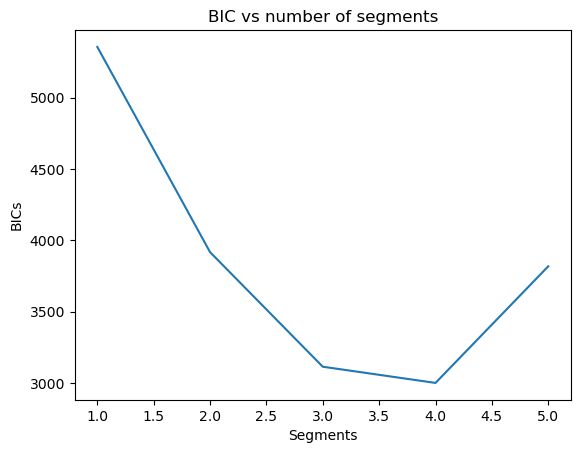

In [55]:
segment_count = [1, 2, 3, 4, 5]
BICs = [BIC, BIC_2, BIC_3, BIC_4, BIC_5]
plt.plot(segment_count, BICs)
plt.title("BIC vs number of segments")
plt.xlabel("Segments")
plt.ylabel("BICs")
plt.show()

#### Lower the BIC, the better. Hence, model with 4 segments is the best.